# The Network of Sentence-Co-Occuring Words of a Document 
### The case of Bruno Latour's *An Inquiry into Modes of Existence*
## By Moses Boudourides & Sergios Lenis 

**IMPORTANT**: To use this notebook, you'll need to

1. Install IPython Notebook (easiest way: use [Anaconda](http://store.continuum.io))
2. Download this notebook and all other Python scripts used here from [https://github.com/mboudour/WordNets](https://github.com/mboudour/WordNets)
3. Run `ipython notebook` in the same directory where notebook and scripts were put

<a href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

## Importing Python modules 

In [1]:
import random
import urllib
import nltk
import codecs
from textblob import TextBlob
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline 
%load_ext autoreload

## I. Importing a Document as Text

1. If the document is a text file from your own storage, move it in the same directory where this notebook and the complementary script tools.py are put and make the corresponding changes of the names of next cell.
2. If the document is a pdf file from your own storage or at a URL, first convert it to text using an online converter like http://document.online-convert.com/convert-to-txt and then follow previous step.
3. If the document is a text file at a URL, comment out next cell and uncomment the subsequent cell where you should make the corresponding changes of the names of that cell.

## ATTENTION: Only one of cells (I1), (I2) and (I3) has to be active (uncommented)!

### (I1) Importing a Document as Text from a Locally Stored txt File

In [2]:
filename = 'Latour_AIME.txt'
titlename = "Latour's AIME"

f = codecs.open(filename, "r", encoding="utf-8")
fTemp = codecs.open("tempASCII", "w", encoding="ascii", errors="ignore")
fTemp.write('temp.txt')
document=f.read()
blobbook = TextBlob(document)

### (I2) Importing a Document as Text from a pdf File at a URL

In [3]:
# # URLpdf = u'https://ecomig2014.files.wordpress.com/2014/08/178919402-latour-bruno-an-inquiry-into-modes-of-existence-an-anthropology-of-the-moderns-pdf.pdf'

# filename = 'Latour_AIME.txt'
# titlename = "Latour's AIME"

# f = codecs.open(filename, "r", encoding="utf-8")
# fTemp = codecs.open("tempASCII", "w", encoding="ascii", errors="ignore")
# fTemp.write('temp.txt')
# document=f.read()

### (I3) Importing a Document as Text from a txt File at a URL

In [4]:
# reload(sys)  
# sys.setdefaultencoding('utf8')

# URLname = u'https://www.w3.org/services/html2txt?url=http%3A%2F%2Fwww.bruno-latour.fr%2Fnode%2F328&noinlinerefs=on&nonums=on'
# titlename="Summary of Latour's AIME"

# f=urllib.urlopen(URLname.encode("UTF-8"))
# document=f.read()

## II. Selecting Terms in the Document as the WordNet Nodes

We may select terms in the document as the wordnet nodes in three ways:

1. Using a default list of terms (called **selectedTerms**) composed from the Index or the Table of Contents or by reading (parts of) the document. 
2. Inserting a user-defined list of terms.
3. Extracting the **noun phrases** of the document through TextBlob.

## ATTENTION: Only one of cells (II1), (II2) and (II3) has to be active (uncommented)!

### (II1) Using a Default List of Selected Terms

In [15]:
# For Latour's AIME we are using the following list of 114 selected terms:

selectedTerms=[
'action', 'actor', 'anthropology', 'anxiety', 'art', 'assemble', 'association', 'attachment', 'attention', 'bads', 
'being', 'calculation', 'category', 'circle', 'civilization', 'connection', 'crises', 'crossing', 'delegation', 
'desire', 'destroy', 'detection', 'detour', 'differences', 'disorder', 'displacement', 'distance', 'emotion', 'empire', 
'ends', 'entities', 'enunciation', 'essence', 'existence', 'existent', 'exploration', 'fail', 'fiction', 'figuration', 
'figure', 'force', 'form', 'frame', 'freedom', 'global', 'goods', 'habit', 'hesitation', 'heterogeneous', 'hiatus', 
'horror', 'imitate', 'impossibility', 'information', 'ingenuity', 'inquiry', 'inscription', 'install', 'interest', 
'interpretive', 'invention', 'judgment', 'lacks', 'law', 'link', 'material', 'means', 'metamorphosis', 'mistake', 
'mode', 'modern', 'morality', 'narrative', 'network', 'obstacle', 'occidentalism', 'order', 'organization', 'passion', 
'person', 'politics', 'possibility', 'preposition', 'presence', 'production', 'project', 'protect', 'reason', 
'reconnect', 'reference', 'religion', 'represent', 'reproduction', 'research', 'resistance', 'risk', 'science', 
'script', 'scruple', 'society', 'speak', 'surprise', 'technology', 'template', 'time', 'transformation', 'translation', 
'traverse', 'trope', 'vacillation', 'veil', 'work', 'world', 'zigzag'    
]

# More terms can be manually inserted.

# Since the visualization of networks in **networkx** is rather obscures for more than 100 nodes, we randomly select
# a smaller number (k) of terms among the ones in the above list.

k = 15 # Number of terms to be randomly selected from the above selectedTerms list
selectedTerms = random.sample(selectedTerms, k)

dfst=pd.DataFrame(columns=["%s selected terms" %titlename, "Frequencies"])
u=1
selectedTermsDic={}
for l in selectedTerms: 
    dfst.loc[u]=[l,blobbook.word_counts[l]]
    selectedTermsDic[l]=blobbook.word_counts[l]
    u+=1
dfst.sort([u"Frequencies"],ascending=[0])

/Users/mosesboudourides/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Latour's AIME selected terms,Frequencies
2,mode,297
9,organization,64
6,circle,59
5,morality,35
12,script,30
8,entities,28
3,calculation,24
7,enunciation,19
1,invention,17
11,existent,9


### (II2) Inserting a User-Defined List of Selected Terms

In [16]:
# selectedT=raw_input('Type L for a list of terms or I for terms to be added one by one. Type "Enter" to exit!')
# if selectedT.strip() == 'L':
#     selectedTerms=input('Paste list')
# elif selectedT.strip() == 'I':
#     selectedTerms=[]
#     while True:
#         selec=raw_input('Give the next term')
#         if len(selec.strip()) >1:
#             selectedTerms.append(selec)
#         else:
#             break
# 
# dfst=pd.DataFrame(columns=["%s selected terms" %titlename, "Frequencies"])
# u=1
# selectedTermsDic={}
# for l in selectedTerms: 
#     dfst.loc[u]=[l,blobbook.word_counts[l]]
#     selectedTermsDic[l]=blobbook.word_counts[l]
#     u+=1
# dfst.sort([u"Frequencies"],ascending=[0])

### (II3) Extracting TextBlob Noun Phrases

In [17]:
# npbook = blobbook.np_counts
# dfst = pd.DataFrame(columns=["%s noun phrases" %titlename, "Frequencies"])
# u=1
# selectedTermsDic={}
# for l in npbook: 
#     dfst.loc[u]=[l,npbook[l]]
#     selectedTermsDic[l]=blobbook.word_counts[l]
#     u+=1
# print "The total number of noun phrases in %s is %i." %(titlename,len(npbook))
# dfst.sort(["Frequencies"], ascending=[0])

In [18]:
# LatourAIMEterms = {}
# dfl=pd.DataFrame(columns=["Selected terms", titlename])
# u=1
# for l,v in selectedTermsDic.items(): 
#     LatourAIMEterms[l]= v
#     dfl.loc[u]=[l,v]
#     u+=1

## III. Constructing the Network of Sentence-Co-Occuring Words in the Document

In [19]:
%autoreload 2
from tools import occurrences, makegraph

documentDict = occurrences(document,selectedTermsDic)
documentGraph = makegraph(documentDict)
pos=nx.spring_layout(documentGraph,scale=50,k=0.8,iterations=20)
# pos=nx.graphviz_layout(documentGraph)


## IV. The Degree Histogram of the Network of Sentence-Co-Occuring Words in the Document

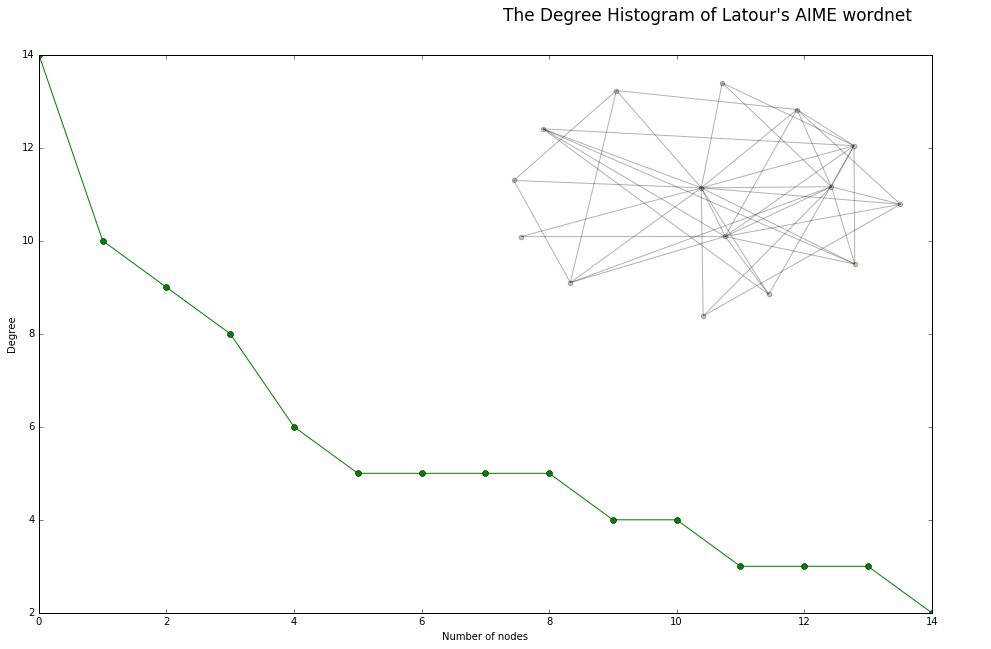

In [20]:
from tools import dhist

sstth="The Degree Histogram of %s wordnet" %titlename
dhp=dhist(documentGraph,sstth,pos=pos)

## V. Plotting the Network of Sentence-Co-Occuring Words in the Document

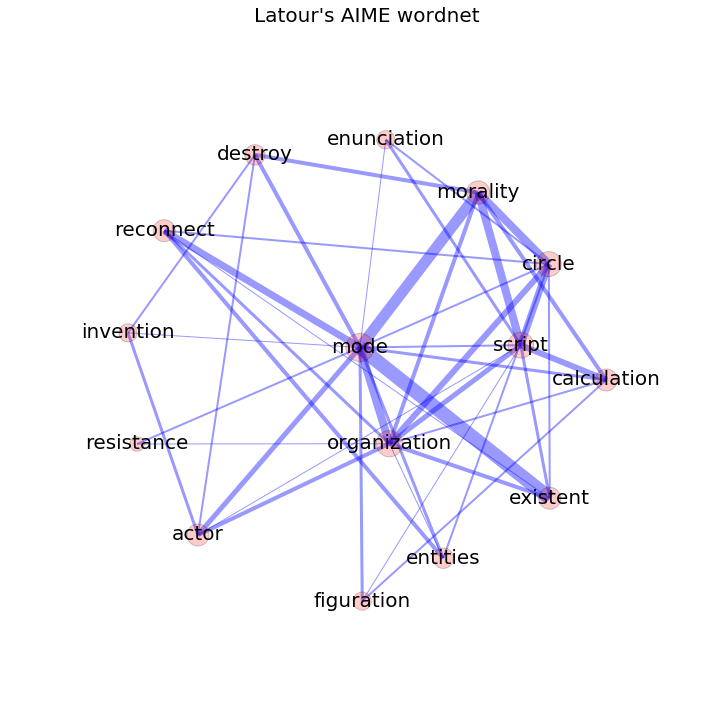

In [21]:
from tools import draw_network

sstt="%s wordnet" %titlename
possit=draw_network(documentGraph,sstt,pos=pos,with_edgewidth=True,withLabels=True,labfs=20,valpha=0.2,ealpha=0.4,labelfont=15,with_node_weight=True,node_size_fixer=300.)

## VI. Centralities of Nodes in the Network of Sentence-Co-Occuring Words in the Document

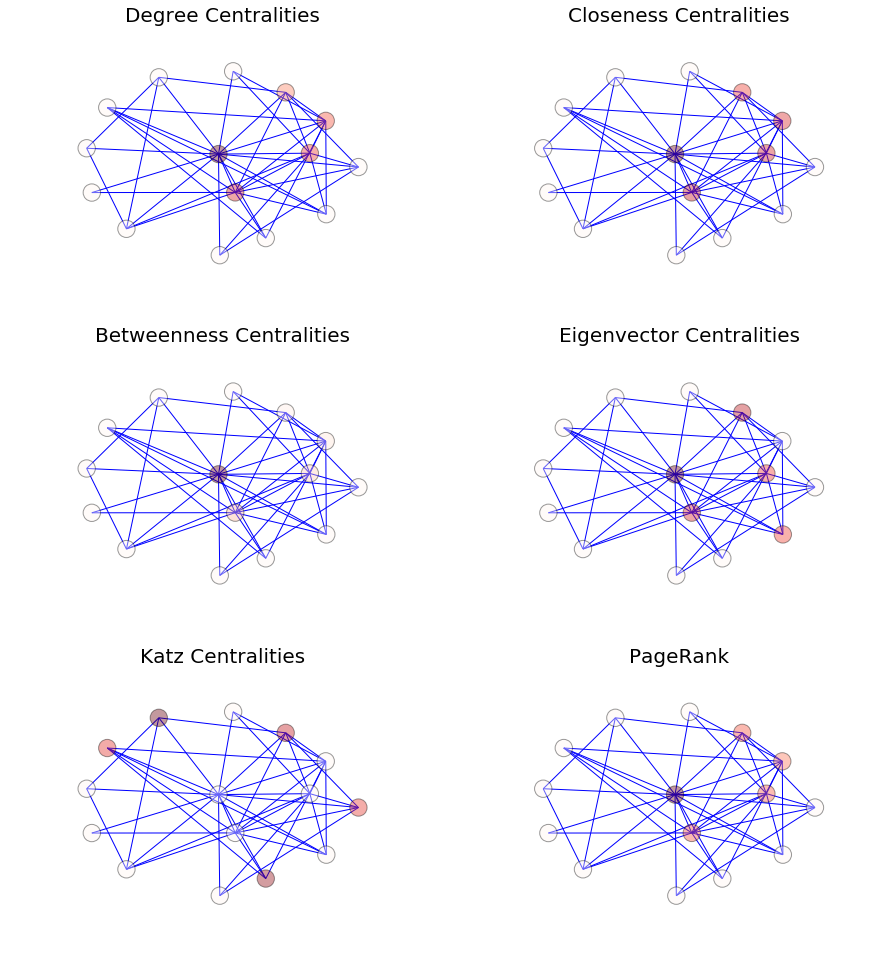

In [22]:
from tools import draw_centralities_subplots

centrali=draw_centralities_subplots(documentGraph,pos,withLabels=False,labfs=5,figsi=(15,22),ealpha=1,vals=True)

### The table of Centralities of Nodes in the Network of Sentence-Co-Occuring Words in the Document

In [23]:
dfc=pd.DataFrame()
u=0
for i,k in centrali.items():
    dfc.insert(u,i,k.values())
    u+=1
dfc.insert(0,'Nodes',centrali[centrali.keys()[0]].keys())
dfc

,Nodes,closeness_centrality,katz_centrality,betweenness_centrality,page_rank,eigenvector_centrality,degree_centrality
0,figuration,0.560000,0.203442,0.000000,0.025120,0.068135,0.214286
1,enunciation,0.560000,-0.425557,0.000000,0.024629,0.064373,0.214286
2,script,0.736842,-0.113817,0.074176,0.103302,0.327883,0.642857
3,calculation,0.608696,0.253528,0.007326,0.053409,0.183325,0.357143
4,resistance,0.538462,-0.214340,0.000000,0.017325,0.042594,0.142857
5,actor,0.608696,-0.228941,0.018315,0.052114,0.144163,0.357143
6,entities,0.583333,0.352142,0.000000,0.035387,0.099439,0.285714
7,invention,0.560000,-0.061898,0.000000,0.027384,0.036336,0.214286
8,mode,1.000000,0.064178,0.400183,0.189963,0.515278,1.000000
9,reconnect,0.608696,0.259730,0.002747,0.053755,0.184030,0.357143


## VII. Communities of Nodes in the Network of Sentence-Co-Occuring Words in the Document

Number of communities of Latour's AIME wordnet = 3
Community partition of Latour's AIME wordnet:
[['figuration', 'resistance', 'entities', 'mode', 'reconnect', 'existent'], ['enunciation', 'script', 'calculation', 'organization', 'circle', 'morality'], ['actor', 'invention', 'destroy']]
Community modularity of Latour's AIME wordnet = 0.1669


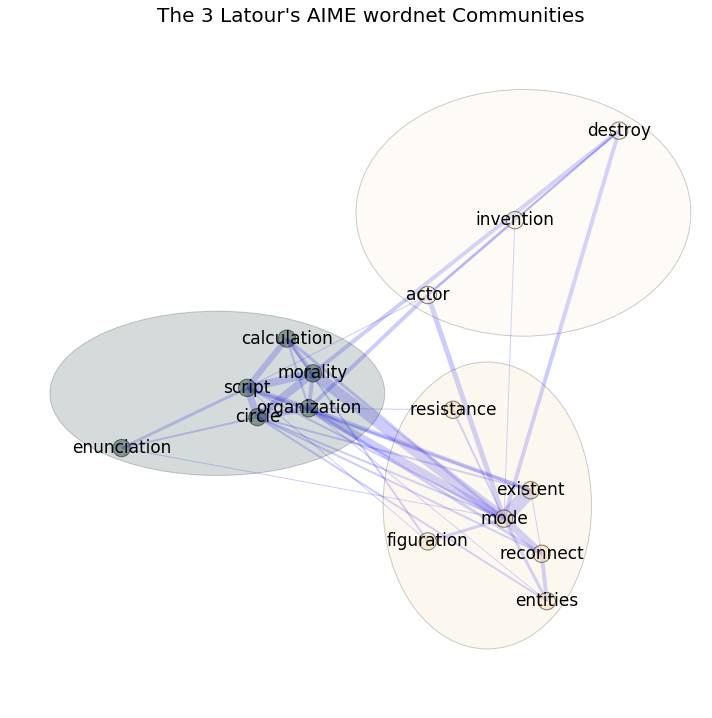

In [24]:
%autoreload 2
from tools import draw_comms, modul_arity, print_communities

part,nodper=print_communities(documentGraph,sstt)

d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=0.2
vcc={}
sstta="The %s %s Communities" %(max(part.values())+1,sstt)

draw_comms(documentGraph,documentGraph.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper,sstta,titlefont=20,labelfont=17,valpha=0.5)